# Importing necessary libraries

In [1]:
import cv2
import pyautogui
from time import time
from math import hypot
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe Hand class for static images,class for videos,drawing class.

In [2]:
# Initialize MediaPipe Hand class for static images.
mp_hand_image = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)

# Initialize MediaPipe Hand class for videos.
mp_hand_video = mp.solutions.hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.7, min_tracking_confidence=0.7)

# Initialize MediaPipe drawing class.
mp_drawing = mp.solutions.drawing_utils


# Definining DetectHand Function

In [3]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

def detectHand(image, hand, draw=False, display=False):
    '''
    This function performs hand tracking on the input image.
    Args:
        image:   The input image on which hand tracking needs to be performed.
        hand:    The hand tracking function required to perform the hand detection.
        draw:    A boolean value that is if set to true the function draws hand landmarks on the output image.
        display: A boolean value that is if set to true the function displays the original input image, and the
                 resultant image and returns nothing.
    Returns:
        output_image: The input image with the detected hand landmarks drawn if it was specified.
        results:      The output of hand tracking on the input image.
    '''

    # Create a copy of the input image.
    output_image = image.copy()

    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform hand tracking.
    results = hand.process(imageRGB)

    # Check if any hands are detected and are specified to be drawn.
    if results.multi_hand_landmarks and draw:

        # Draw Hand Landmarks on the output image.
        for hand_landmarks in results.multi_hand_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(image=output_image, landmark_list=hand_landmarks,
                                                      connections=mp.solutions.hands.HAND_CONNECTIONS,
                                                      landmark_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=(255, 255, 255),
                                                                                                                thickness=2, circle_radius=2),
                                                      connection_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=(49, 125, 237),
                                                                                                                   thickness=2, circle_radius=2))

    # Check if the original input image and the resultant image are specified to be displayed.
    if display:

        # Display the original input image and the resultant image.
        plt.figure(figsize=[22, 22])
        plt.subplot(121); plt.imshow(image[:, :, ::-1]); plt.title("Original Image"); plt.axis('off');
        plt.subplot(122); plt.imshow(output_image[:, :, ::-1]); plt.title("Output Image"); plt.axis('off');

    # Otherwise
    else:

        # Return the output image and the results of hand tracking.
        return output_image, results


# Performing Hand landmark Detection from Hand Image

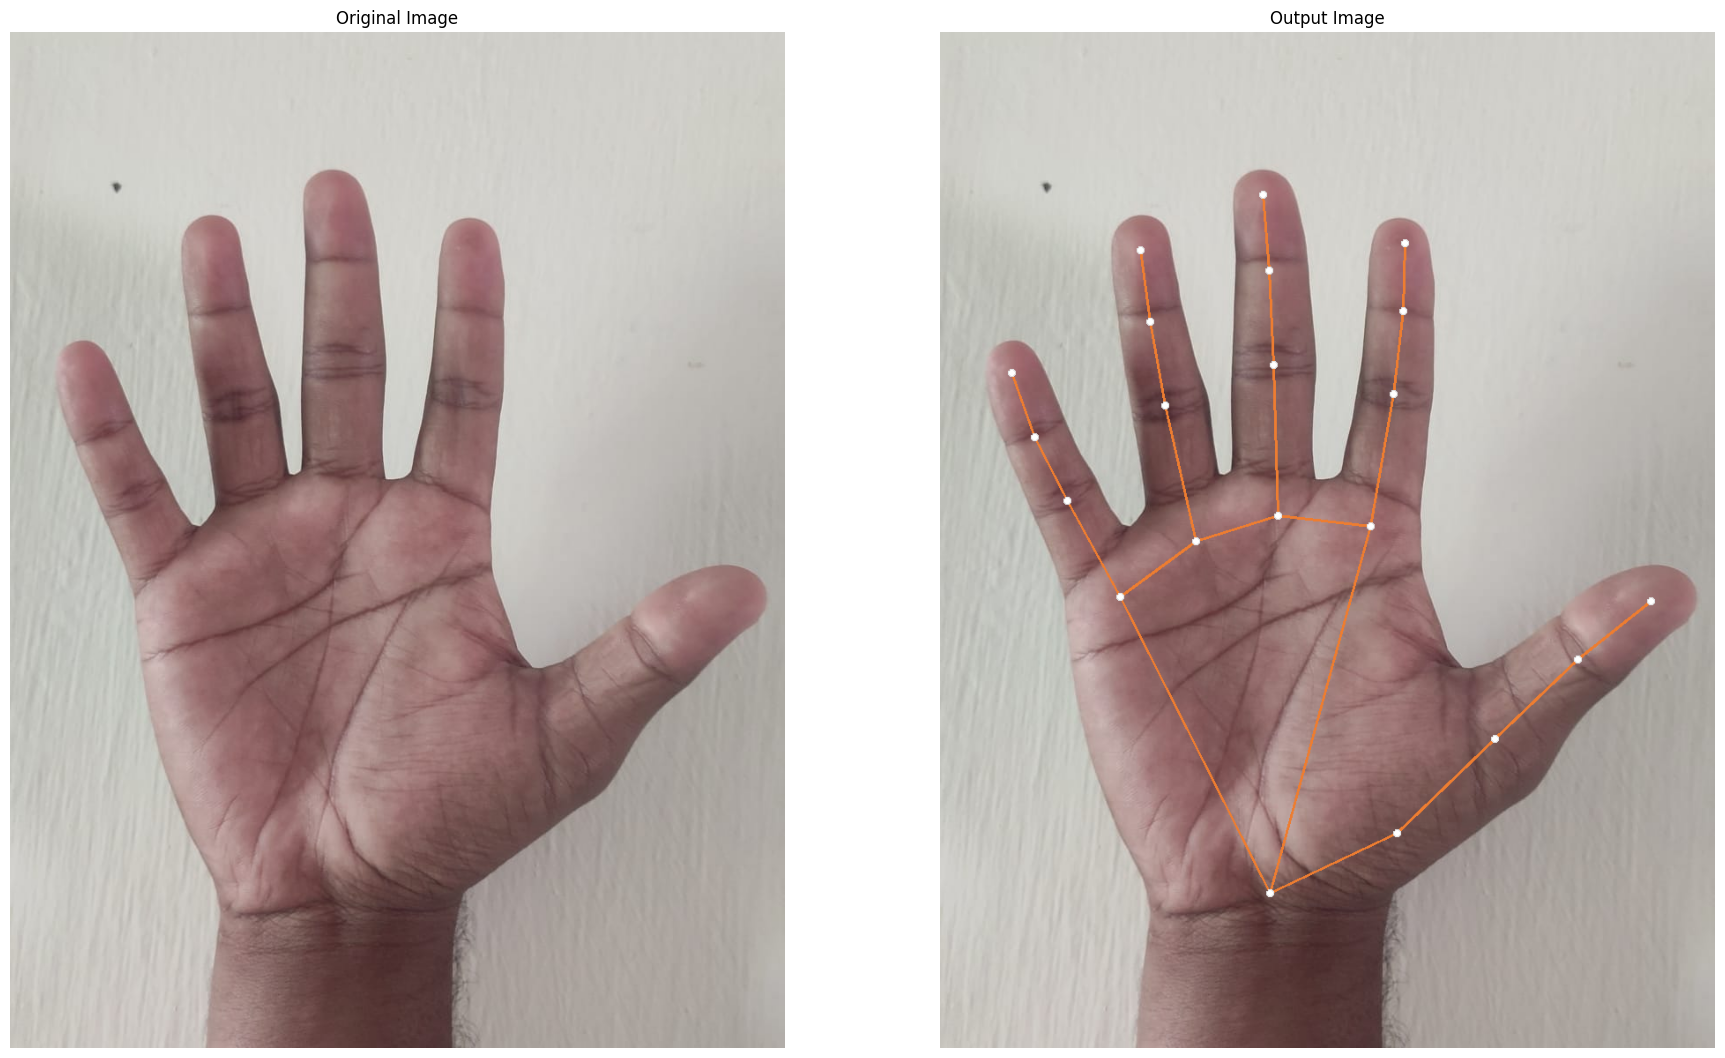

In [4]:
import cv2

# Assuming that you have already initialized hand_image object and detectHand function as mentioned before.
IMG_PATH = "C:\\Users\\svani\\OneDrive\\Documentos\\DineshKumar\\Images\\My hand.jpg"
image = cv2.imread(IMG_PATH)

# Perform hand landmarks detection on the sample image.
detectHand(image, mp_hand_image, draw=True, display=True)


# Defining CheckRightHandLandmarksClose Function

In [5]:
import cv2
import mediapipe as mp
from math import hypot

# Initialize MediaPipe hands module.
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Function to check if the right hand landmarks indicate a close hand gesture.
def checkRightHandLandmarksClose(image, results, distance_threshold=30):
    right_hand_landmarks = None
    
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            if hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x > 0.5:
                right_hand_landmarks = hand_landmarks
                for landmark in hand_landmarks.landmark:
                    height, width, _ = image.shape
                    cx, cy = int(landmark.x * width), int(landmark.y * height)
                    cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)  # Draw a circle at each landmark position

        if right_hand_landmarks:
            right_index = (int(right_hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * width),
                           int(right_hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * height))
            right_middle = (int(right_hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * width),
                            int(right_hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * height))
            right_distance = int(hypot(right_index[0] - right_middle[0], right_index[1] - right_middle[1]))

            if right_distance < distance_threshold:
                hand_status = 'Right Hand Close'
                color = (0, 255, 0)  # Green color for right hand close status.
            else:
                hand_status = 'Right Hand Not Close'
                color = (0, 0, 255)  # Red color for right hand not close status.

            cv2.putText(image, hand_status, (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, color, 3)
            cv2.putText(image, f'Right Distance: {right_distance}', (10, 70), cv2.FONT_HERSHEY_PLAIN, 2, color, 3)

    return image




# Acessing WebCam for the above Defined Function

In [6]:
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3, 1280)
camera_video.set(4, 960)

# Create named window for resizing purposes.
cv2.namedWindow('Hand Landmarks', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    ret, frame = camera_video.read()

    if not ret:
        continue

    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)

    # Convert the frame to RGB.
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform hand landmarks detection on the frame.
    results = hands.process(frame_rgb)

    # Check if the right hand landmarks indicate a close hand gesture.
    frame = checkRightHandLandmarksClose(frame, results)

    # Display the frame.
    cv2.imshow('Hand Landmarks', frame)

    # Check if the 'ESC' key is pressed and break the loop if it is.
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Release the VideoCapture Object and close the windows.
camera_video.release()
cv2.destroyAllWindows()
hands.close()

# Defining the Second Function CheckHandHorizontalPosition for Left ,Right ,Center

In [7]:
import cv2
import mediapipe as mp

# Initialize mediapipe hands class.
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)

# Function to check the horizontal position of the hand based on thumb direction.
# Function to check the horizontal position of the hand based on thumb direction.
# Function to check the horizontal position of the hand based on thumb direction and draw landmarks.
def checkHandHorizontalPosition(image, results, draw=True, display=False):
    height, width, _ = image.shape
    right_hand_landmarks = None
    
    # Check if hand landmarks in the frame are detected.
    if results.multi_hand_landmarks:
        # Assuming there is only one hand in the frame (the closest hand to the camera).
        right_hand_landmarks = results.multi_hand_landmarks[0]

        # Get the x-coordinate of the thumb landmark (index 4) and the x-coordinate of the palm landmark (index 0).
        thumb_x = int(right_hand_landmarks.landmark[4].x * width)
        palm_x = int(right_hand_landmarks.landmark[0].x * width)

        # Check thumb direction and determine horizontal position.
        thumb_direction_threshold = 0.1  # Adjust this threshold based on your requirements.
        if thumb_x - palm_x > thumb_direction_threshold * width:
            horizontal_position = 'Right'
        elif palm_x - thumb_x > thumb_direction_threshold * width:
            horizontal_position = 'Left'
        else:
            horizontal_position = 'Center'

        # Draw landmarks on the hand.
        for idx, landmark in enumerate(right_hand_landmarks.landmark):
            cx, cy = int(landmark.x * width), int(landmark.y * height)
            # Highlight the thumb landmark in a different color.
            color = (0, 255, 0) if idx == 4 else (255, 0, 0)
            cv2.circle(image, (cx, cy), 5, color, -1)  # Draw a circle at each landmark position

        # Check if the horizontal position and a line at the center of the image is specified to be drawn.
        if draw:
            # Write the horizontal position of the hand on the image.
            cv2.putText(image, horizontal_position, (5, height - 10), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 3)
            # Draw a line at the center of the image.
            cv2.line(image, (width // 2, 0), (width // 2, height), (255, 255, 255), 2)

        # Check if the output image is specified to be displayed.
        if display:
            # Display the output image.
            cv2.imshow('Hand Horizontal Position', image)
            cv2.waitKey(1)
        else:
            # Return the output image and the hand's horizontal position.
            return image, horizontal_position

        # Check if the horizontal movement and a line at the center of the image is specified to be drawn.
        if draw:
            # Write the horizontal movement of the hand on the image.
            cv2.putText(image, horizontal_movement, (5, height - 10), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 3)
            # Draw a line at the center of the image.
            cv2.line(image, (width // 2, 0), (width // 2, height), (255, 255, 255), 2)

        # Check if the output image is specified to be displayed.
        if display:
            # Display the output image.
            cv2.imshow('Hand Horizontal Movement', image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            # Return the output image and the hand's horizontal movement.
            return image, horizontal_movement


# Acessing the WebCam for Checking The Second Function

In [8]:
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3, 1280)
camera_video.set(4, 720)

# Create named window for resizing purposes.
cv2.namedWindow('Hand Horizontal Movement', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    ret, frame = camera_video.read()

    if not ret:
        continue

    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)

    # Convert the frame to RGB.
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform hand landmarks detection on the frame.
    results = hands.process(frame_rgb)

    # Check if hand landmarks in the frame are detected.
    if results.multi_hand_landmarks:
        frame, horizontal_movement = checkHandHorizontalPosition(frame, results, draw=True, display=False)
        print("Horizontal Movement:", horizontal_movement)

    # Display the frame.
    cv2.imshow('Hand Horizontal Movement', frame)

    # Check if the 'ESC' key is pressed and break the loop if it is.
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Release the VideoCapture Object and close the windows.
camera_video.release()
cv2.destroyAllWindows()
hands.close()


Horizontal Movement: Center
Horizontal Movement: Center
Horizontal Movement: Center
Horizontal Movement: Center
Horizontal Movement: Center
Horizontal Movement: Center
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Movement: Center
Horizontal Movement: Center
Horizontal Movement: Center
Horizontal Movement: Center
Horizontal Movement: Center
Horizontal Movement: Center
Horizontal Movement: Center
Horizontal Movement: Right
Horizontal Movement: Right
Horizontal Move

# Defining the Third Required Function DectectHandSymbol Function for Checking Jump,Stand,Crouch

In [9]:
import cv2
import mediapipe as mp

# Initialize mediapipe hands class.
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)

def detectHandSymbol(image, results, MID_X=640, draw=False, display=False):
    # Get the height and width of the image.
    height, width, _ = image.shape
    right_hand_landmarks = None
    
    # Set default symbol to Standing
    symbol = 'Standing'

    # Check if right hand landmarks are detected
    if results.multi_hand_landmarks:
        # Assuming there is only one hand in the frame (the closest hand to the camera).
        right_hand_landmarks = results.multi_hand_landmarks[0]
        
        # Get y-coordinates of specific finger landmarks
        thumb_y = int(right_hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * height)
        index_y = int(right_hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * height)
        middle_y = int(right_hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * height)
        ring_y = int(right_hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * height)
        pinky_y = int(right_hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * height)

        # Check if the thumb is higher than other fingers, indicating an upward thumbs-up (Jumping)
        if thumb_y < index_y and thumb_y < middle_y and thumb_y < ring_y and thumb_y < pinky_y:
            symbol = 'Jumping'
        
        # Check if the thumb is lower than other fingers, indicating a downward thumbs-up (Crouching)
        elif thumb_y > index_y and thumb_y > middle_y and thumb_y > ring_y and thumb_y > pinky_y:
            symbol = 'Crouching'

    # Check if the symbol and a vertical line at the threshold is specified to be drawn.
    if draw:
        # Draw landmarks on the hand.
        if right_hand_landmarks:
            for landmark in right_hand_landmarks.landmark:
                cx, cy = int(landmark.x * width), int(landmark.y * height)
                cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)  # Draw a circle at each landmark position

        # Write the detected symbol on the image.
        cv2.putText(image, symbol, (5, height - 50), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 3)

        # Draw a vertical line to represent the threshold
        cv2.line(image, (MID_X, 0), (MID_X, height), (255, 255, 255), 2)

    # Check if the output image is specified to be displayed.
    if display:
        # Display the output image.
        cv2.imshow("Hand Symbol Detection", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    # Otherwise, return the output image and detected symbol.
    else:
        return image, symbol



# Opening the Webcam for the Previous Function

In [10]:
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3, 1280)
camera_video.set(4, 720)

# Create named window for resizing purposes.
cv2.namedWindow('Hand Symbol Detection', cv2.WINDOW_NORMAL)

# MID_X is the initial vertical line x-coordinate to determine jump or crouch position.
MID_X = 640

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    ret, frame = camera_video.read()

    if not ret:
        continue

    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)

    # Convert the frame to RGB.
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform hand landmarks detection on the frame.
    results = hands.process(frame_rgb)

    # Check if hand landmarks in the frame are detected.
    if results.multi_hand_landmarks:
        # Call the detectHandSymbol function here to get the detected symbol.
        frame, hand_symbol = detectHandSymbol(frame, results, MID_X, draw=True, display=False)
        print("Detected Hand Symbol:", hand_symbol)

    # Display the frame.
    cv2.imshow('Hand Symbol Detection', frame)

    # Check if the 'ESC' key is pressed and break the loop if it is.
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Release the VideoCapture Object and close the windows.
camera_video.release()
cv2.destroyAllWindows()
hands.close()


Detected Hand Symbol: Standing
Detected Hand Symbol: Standing
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Standing
Detected Hand Symbol: Jumping
Detected Hand Symbol: Standing
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Standing
Detected Hand Symbol: Jumping
Detected Hand Symbol: Standing
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Standing
Detected Hand Symbol: Standing
Detected Hand Symbol: Standing
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Jumping
Detected Hand Symbol: Crouching
Detected Hand Symbol: Crouching
Detected Hand Symbol: Crouching
Detected Hand Symbol: Crouching
Detected Hand Symbol: C

# Pyautogui Keys References

In [12]:
# Press the up key.
pyautogui.press(keys='up')

In [13]:
# Press the down key.
pyautogui.press(keys='down')

In [14]:
# Press the up (4 times) and down (1 time) key.
pyautogui.press(keys=['up', 'up', 'up', 'up', 'down'])

In [15]:
# Press the down key 4 times.
pyautogui.press(keys='down', presses=4)

In [17]:
# Hold down the shift key.
pyautogui.keyDown(key='shift')

# Press the enter key two times.
pyautogui.press(keys='enter', presses=2)

# Release the shift key.
pyautogui.keyUp(key='shift')

In [20]:
# Hold down the shift key.
pyautogui.keyDown(key='ctrl')

# Press the tab key.
pyautogui.press(keys='tab')

# Release the shift key.
pyautogui.keyUp(key='ctrl')

In [21]:
# Press the mouse right button. It will open up the menu.
pyautogui.click(button='right')

In [22]:
# Move to 1300, 800, then click the right mouse button
pyautogui.click(x=1300, y=800, button='right')

# Play Game for Hand Gestures
In the final step, we will have to combine all the components to build the final application. 

We will use the outputs of the functions created above **`checkRightHandLandmarksClose`** (to start the game), **`checkHandHorizontalPosition`**  and **`detectHandSymbol`** to trigger the relevant keyboard and mouse events and control the game's character with our hand movements.

Now we will run the cell below and click [here](https://poki.com/en/g/temple-run-2) to play the game in our browser using our hand gestures and movements.

In [20]:
import cv2
import pyautogui
import mediapipe as mp
from math import hypot

# Initialize MediaPipe hands module.
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.7)


# Function to check if the right hand landmarks indicate a close hand gesture.
def checkRightHandLandmarksClose(image, results, distance_threshold=30):
    right_hand_landmarks = None
    hand_status = 'Right Hand Not Close'

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            if hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x > 0.5:
                right_hand_landmarks = hand_landmarks
                for landmark in hand_landmarks.landmark:
                    height, width, _ = image.shape
                    cx, cy = int(landmark.x * width), int(landmark.y * height)
                    cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)  # Draw a circle at each landmark position

        if right_hand_landmarks:
            right_index = (int(right_hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * width),
                           int(right_hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * height))
            right_middle = (int(right_hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * width),
                            int(right_hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * height))
            right_distance = int(hypot(right_index[0] - right_middle[0], right_index[1] - right_middle[1]))

            if right_distance < distance_threshold:
                hand_status = 'Right Hand Close'

            cv2.putText(image, hand_status, (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
            cv2.putText(image, f'Right Distance: {right_distance}', (10, 70), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)

    return image, hand_status

# Function to check horizontal position of the hand.
def checkHandHorizontalPosition(image, results, draw=True):
    height, width, _ = image.shape
    right_hand_landmarks = None
    horizontal_position = 'Center'

    if results.multi_hand_landmarks:
        right_hand_landmarks = results.multi_hand_landmarks[0]

        right_palm_x = int(right_hand_landmarks.landmark[0].x * width)

        center_threshold = width // 3
        if right_palm_x < center_threshold:
            horizontal_position = 'Left'
        elif right_palm_x > 2 * center_threshold:
            horizontal_position = 'Right'

        if draw:
            cv2.putText(image, horizontal_position, (5, height - 10), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 3)
            cv2.line(image, (width // 2, 0), (width // 2, height), (255, 255, 255), 2)

    return image, horizontal_position

# Function to detect specific hand symbols (e.g., thumbs-up for jumping, thumbs-down for crouching).
def detectHandSymbol(image, results, MID_X=640, draw=True):
    height, width, _ = image.shape
    right_hand_landmarks = None
    symbol = 'Standing'

    if results.multi_hand_landmarks:
        right_hand_landmarks = results.multi_hand_landmarks[0]

        thumb_y = int(right_hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * height)
        index_y = int(right_hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * height)
        middle_y = int(right_hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * height)
        ring_y = int(right_hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * height)
        pinky_y = int(right_hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * height)

        if thumb_y < index_y and thumb_y < middle_y and thumb_y < ring_y and thumb_y < pinky_y:
            symbol = 'Jumping'
        elif thumb_y > index_y and thumb_y > middle_y and thumb_y > ring_y and thumb_y > pinky_y:
            symbol = 'Crouching'

    if draw:
        if right_hand_landmarks:
            for landmark in right_hand_landmarks.landmark:
                cx, cy = int(landmark.x * width), int(landmark.y * height)
                cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)

        cv2.putText(image, symbol, (5, height - 50), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 3)
        cv2.line(image, (MID_X, 0), (MID_X, height), (255, 255, 255), 2)

    return image, symbol



In [ ]:
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3, 1280)
camera_video.set(4, 720)

# Create named window for resizing purposes.
cv2.namedWindow('Play Game with Hand Gestures', cv2.WINDOW_NORMAL)

# MID_X is the initial vertical line x-coordinate to determine jump or crouch position.
MID_X = 640

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    ret, frame = camera_video.read()

    if not ret:
        continue

    frame = cv2.flip(frame, 1)  # Flip the frame horizontally for natural visualization

    # Convert the frame to RGB for hands processing.
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame and get results.
    results = hands.process(frame_rgb)

    # Call functions to check hand gestures.
    frame, hand_status = checkRightHandLandmarksClose(frame, results)
    frame, horizontal_position = checkHandHorizontalPosition(frame, results)
    frame, hand_symbol = detectHandSymbol(frame, results, MID_X)

    # Control game based on hand gestures (add your game control logic here).
    if hand_status == 'Right Hand Close':
        if horizontal_position == 'Left':
            pyautogui.press('left')
        elif horizontal_position == 'Right':
            pyautogui.press('right')

        if hand_symbol == 'Jumping':
            pyautogui.press('up')
        elif hand_symbol == 'Crouching':
            pyautogui.press('down')

    # Display the frame.
    cv2.imshow(' Hand Gestures', frame)

    # Break the loop if 'ESC' key is pressed.
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Release the VideoCapture object and close all windows.
camera_video.release()
cv2.destroyAllWindows()
hands.close()
